In [75]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-whitegrid')
%matplotlib inline

from scipy.stats import ttest_ind

In [2]:
df=pd.read_csv('master.csv',encoding='ISO-8859-1')

C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploring Data

In [3]:
df.shape

(181691, 135)

In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
                       ...   
propextent            float64
propextent_txt         object
propvalue 

In [6]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

This graph visualizes that the dataset has several NaN values (Yellow ones)

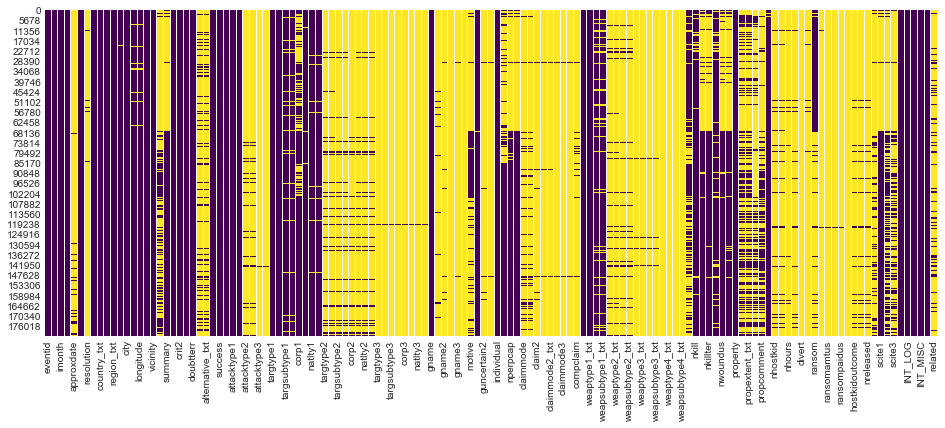

In [7]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)

# Data Cleaning

To start with, we have eliminated most of the columns since they consist of NaN values also we are not going to base our hypothesis on those variables

In [8]:
df.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','propvalue':'CostOfDamage','nperps':'TerroristNumber'},inplace=True)
df=df[['Event_ID','Year','Month','Day','Country','Region','city','AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type','CostOfDamage','TerroristNumber']]
#Number of Terrorists participating in Attack  is  TerroristNumber
df.head(10)

,Event_ID,Year,Month,Day,Country,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,CostOfDamage,TerroristNumber
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN,NaN
1,197000000002,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN,7.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN,NaN
3,197001000002,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
5,197001010002,1970,1,1,United States,North America,Cairo,Armed Assault,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms,NaN,-99.0
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms,NaN,3.0
7,197001020002,1970,1,2,United States,North America,Oakland,Bombing/Explosion,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives,22500.0,-99.0
8,197001020003,1970,1,2,United States,North America,Madison,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary,60000.0,1.0
9,197001030001,1970,1,3,United States,North America,Madison,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary,NaN,1.0


In [9]:
df.isnull().sum()

Event_ID                0
Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
city                  434
AttackType              0
Killed              10313
Wounded             16311
Target                636
Group                   0
Target_type             0
Weapon_type             0
CostOfDamage       142702
TerroristNumber     71115
dtype: int64

From df.head(10) we can observe that TerroristNumber has some invalid values

In [10]:
df = df[pd.notnull(df['TerroristNumber'])]
df.index = pd.RangeIndex(len(df.index))

In [11]:
df = df[df.TerroristNumber != -99]
df.index = pd.RangeIndex(len(df.index))

In [12]:
df = df[df.TerroristNumber != 0]
df.index = pd.RangeIndex(len(df.index))

In [13]:
df = df[pd.notnull(df['Killed'])]
df.index = pd.RangeIndex(len(df.index))

In [14]:
#Bunu koyunca row sayısı 5643 oluyo sıçıyo gibi o yüzden bunu çalıştırmadan yapıyorum
df = df[pd.notnull(df['CostOfDamage'])]
df.index = pd.RangeIndex(len(df.index))

In [14]:
print('No. of rows after dropping nulls: {}'.format(df['Event_ID'].count()))

No. of rows after dropping nulls: 27350


In [15]:
df.shape

(27350, 16)

In [16]:
df.isnull().sum()

Event_ID               0
Year                   0
Month                  0
Day                    0
Country                0
Region                 0
city                  42
AttackType             0
Killed                 0
Wounded              941
Target               119
Group                  0
Target_type            0
Weapon_type            0
CostOfDamage       21707
TerroristNumber        0
dtype: int64

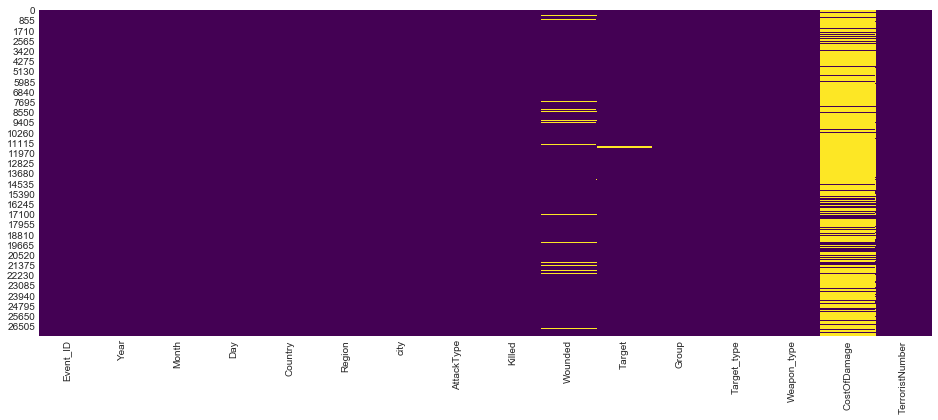

In [17]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)

# Data Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

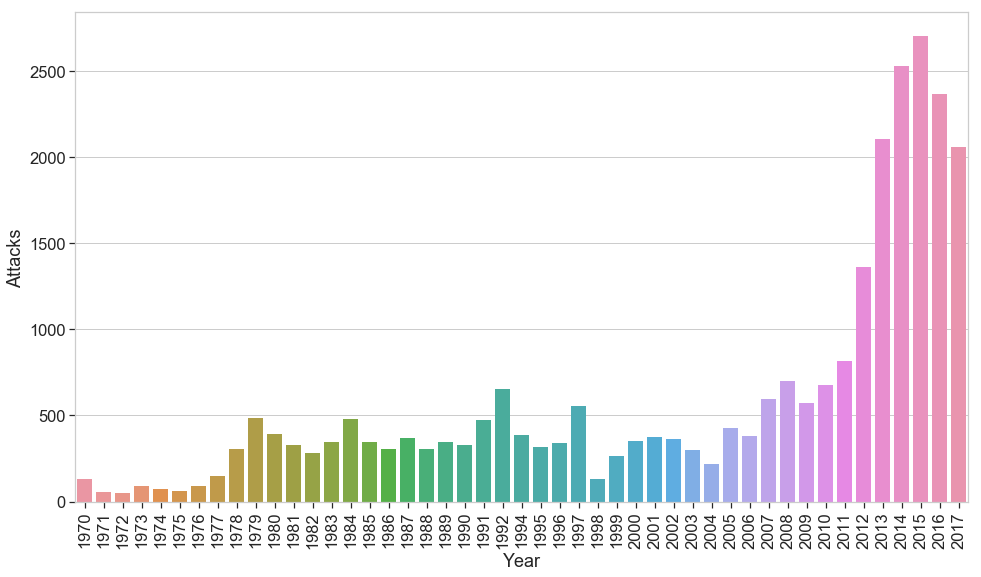

In [18]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
v1=df['Year'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).sort_values(by='Year')
sns.barplot(data=v1,x='Year',y='Attacks',ci=None)
plt.xticks(rotation=90)

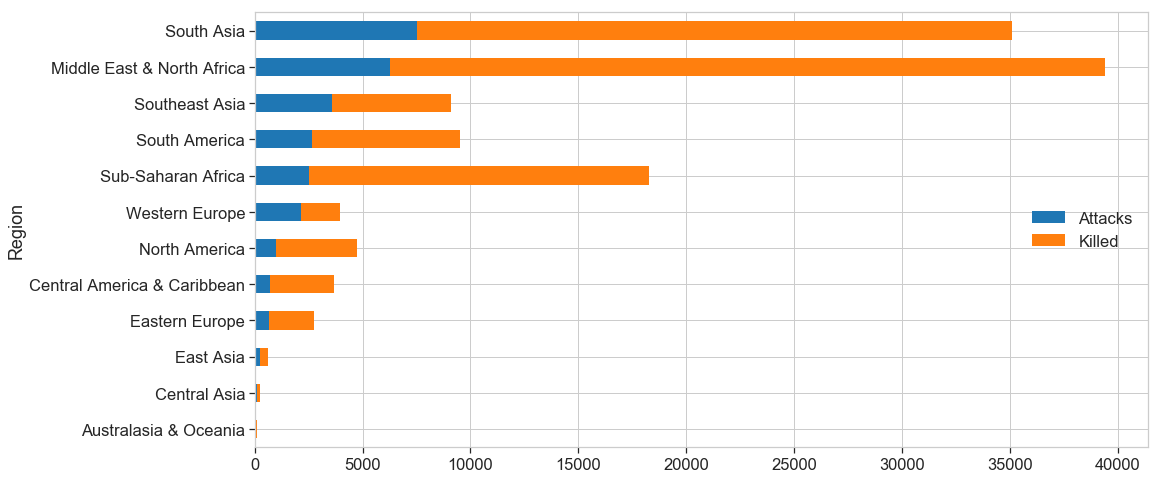

In [19]:
df['Region'].value_counts(ascending=True).to_frame().reset_index().rename(columns={'index':'Region','Region':'Attacks'}).merge(df[['Killed','Region']].groupby('Region').sum().reset_index(),on='Region').plot.barh(x='Region',y=['Attacks','Killed'],figsize=(16,8),stacked=True)
plt.legend(loc=5)

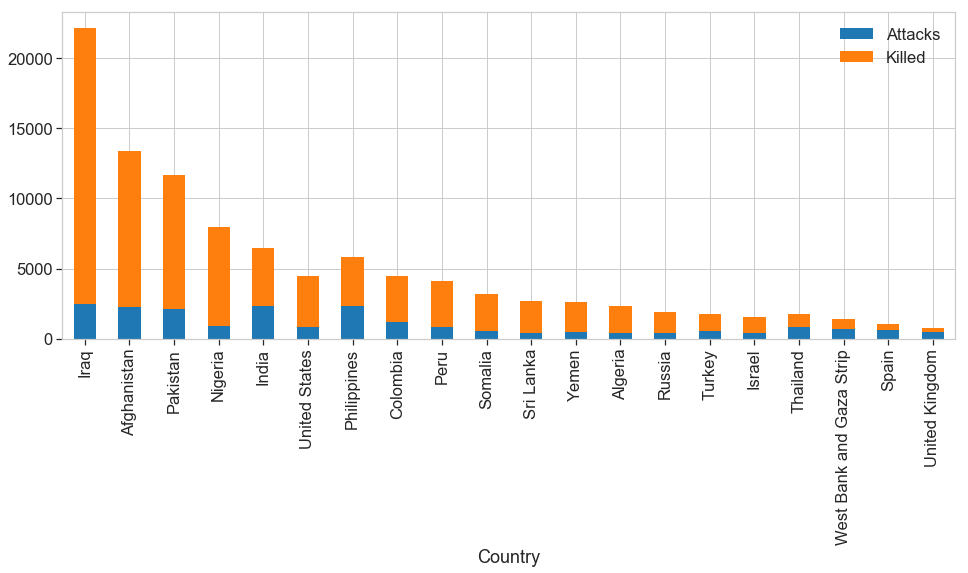

In [20]:
df[df['Country'].isin(df['Country'].value_counts()[0:20].index)][['Killed','Country']].groupby('Country').sum().reset_index().sort_values(by='Killed',ascending=False).merge(df[df['Country'].isin(df['Country'].value_counts()[0:20].index)]['Country'].value_counts().to_frame().reset_index().rename(columns={'index':'Country','Country':'Attacks'}), on='Country').plot.bar(x='Country',y=['Attacks','Killed'],figsize=(16,6),stacked=True)

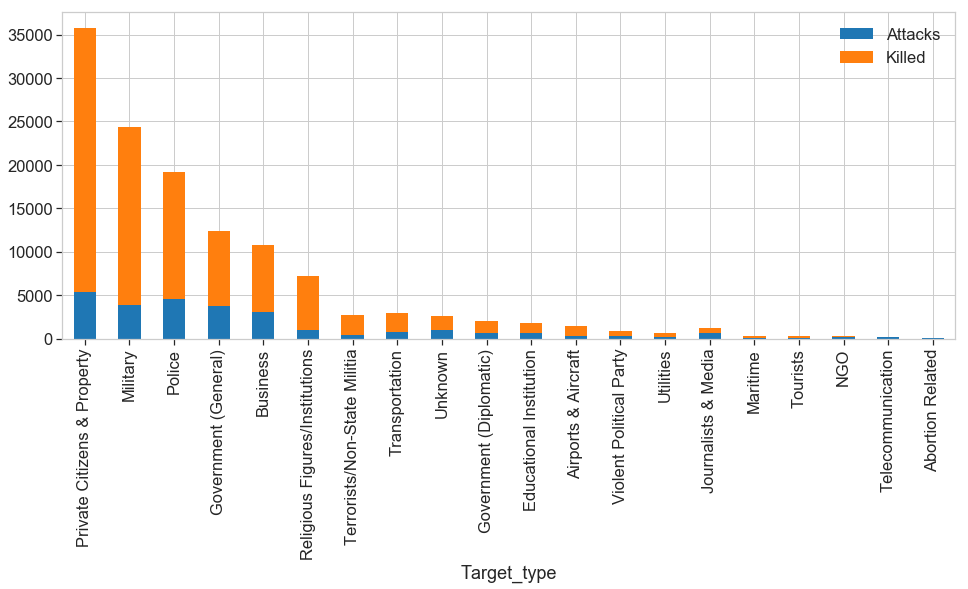

In [21]:
df[df['Target_type'].isin(df['Target_type'].value_counts()[0:20].index)][['Killed','Target_type']].groupby('Target_type').sum().reset_index().merge(df[df['Target_type'].isin(df['Target_type'].value_counts()[0:20].index)]['Target_type'].value_counts().to_frame().reset_index().rename(columns={'index':'Target_type','Target_type':'Attacks'}), on='Target_type').sort_values(by='Killed',ascending=False).plot.bar(x='Target_type',y=['Attacks','Killed'],figsize=(16,6),stacked=True)

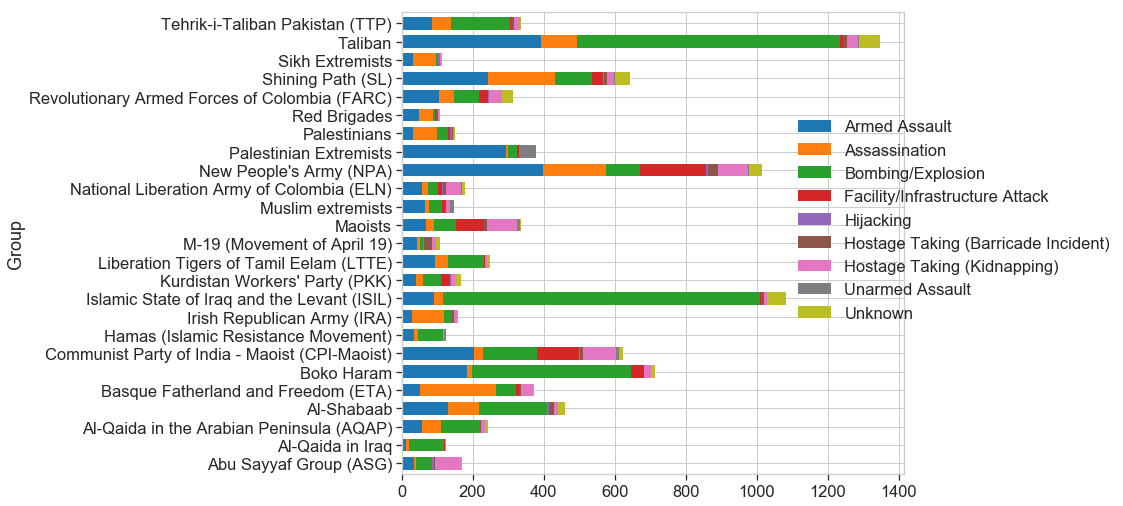

In [22]:
v1=df[df['Group'].isin(df['Group'].value_counts()[1:26].index)]
v2=v1[v1['Target_type'].isin(v1['Target_type'].value_counts()[0:10].index)]
pd.crosstab(v1['Group'],v1['AttackType']).plot.barh(stacked=True,figsize=(9,8.5),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.1,0.8))

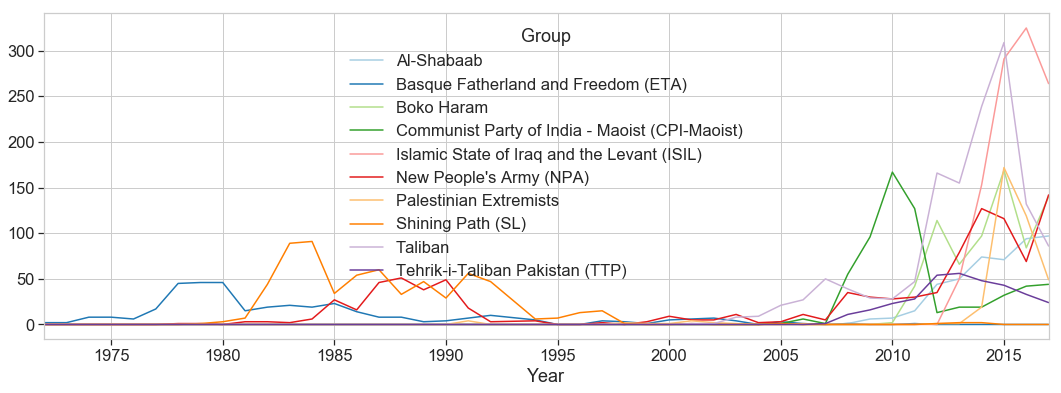

In [23]:
pd.crosstab(df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]['Year'],df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]['Group']).plot(color=sns.color_palette('Paired',10),figsize=(18,6))

Number of attacks Top5 Country

In [24]:
pd.value_counts(df['AttackType'])[0:5]

Bombing/Explosion                 9339
Armed Assault                     8279
Assassination                     4535
Hostage Taking (Kidnapping)       1747
Facility/Infrastructure Attack    1611
Name: AttackType, dtype: int64

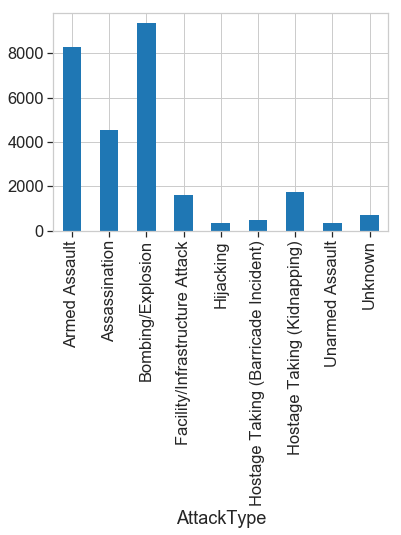

In [25]:
attType=df.groupby('AttackType')['Killed'].count()
attType.plot.bar()

Most used Weapons in Attacks

In [84]:
pd.value_counts(df['Weapon_type'])[0:5]

Firearms      12630
Explosives    10067
Unknown        1733
Incendiary     1463
Melee          1223
Name: Weapon_type, dtype: int64

Most Targeted Groups

In [27]:
pd.value_counts(df['Target_type'])[0:5]

Private Citizens & Property    5423
Police                         4520
Military                       3930
Government (General)           3799
Business                       3050
Name: Target_type, dtype: int64

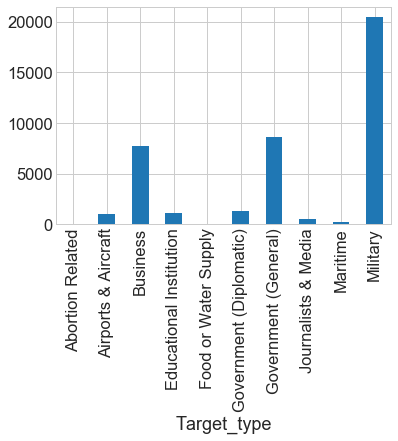

In [86]:
attType=df.groupby('Target_type')['Killed'].sum()[0:10]
attType.plot.bar()

Number of Kills per Attack

In [29]:
df['Killed'].sum()/df['Killed'].count()

3.66

Number of Unique Weapon Types

In [87]:
df['Weapon_type'].nunique()

12

Number of Unique Target Types

In [88]:
df['Target_type'].nunique()

22

# Hypothesis Testing

## 1-Does the weapon type effect the number of killed people?

In [34]:
der=[]
for i in range(0,27350):
    if df['Weapon_type'][i]=="Explosives" :
        der.append(1)
    else:
        der.append(0)

df["ExpOrNot"]=der
ert1=df[df["ExpOrNot"] == 1]["Killed"]
ert2=df[df["ExpOrNot"] == 0]["Killed"]
stats.ttest_ind(ert1, ert2, equal_var=False)

Ttest_indResult(statistic=15.11521942446915, pvalue=2.2285272631943068e-51)

Result:Before the test we can observe there are 12 types of Weapon Types and we need to convert them into 2 samples where these are weapon type is Explosive and others. After the conversion we can group them with their Kills. From the T-test we conduct the P value as 2.2285272631943068e-51 where it is much smaller than the significance level which is 0.05. Since pvalue of this test is smaller than 0.05 we can reject our null hypothesis. Test score is 15.1152 which indicates that the groups are 15 times as different from each other as they are within each other. Since our tscore is large we can say that the groups are different, not similiar.

## 2-Does the target type effect the number of killed people?

In [31]:
die=[]
for i in range(0,27350):
    if df['Target_type'][i]=="Private Citizens & Property" :
        die.append(1)
    else:
        die.append(0)

df["CitizenorNot"]=die
ert1=df[df["CitizenorNot"] == 1]["Killed"]
ert2=df[df["CitizenorNot"] == 0]["Killed"]
stats.ttest_ind(ert1, ert2, equal_var=False)

Ttest_indResult(statistic=5.845911101009332, pvalue=5.314266156639527e-09)

Result:Before the test we can observe there are 22 types of Target Types and we need to convert them into 2 samples where these are target type is Private Citizens & Property and others. After the conversion we can group them with their Kills. From the T-test we conduct the P value as 5.314266156639527e-09 where it is much smaller than the significance level which is 0.05. Since pvalue of this test is smaller than 0.05 we can reject our null hypothesis. Test score is 5.8459 which indicates that the groups are 5 times as different from each other as they are within each other.

## 3-Does the weapon type effect the cost of damage ?

In [33]:
df1 = df.copy()
df1 = df1[pd.notnull(df1['CostOfDamage'])]
df1.index = pd.RangeIndex(len(df1.index))

das=[]
for i in range(0,5643):
    if df1['Weapon_type'][i]=="Firearms" :
        das.append(1)
    else:
        das.append(0)

df1["fireEffect"]=das
ert1=df1[df1["fireEffect"] == 1]["CostOfDamage"]
ert2=df1[df1["fireEffect"] == 0]["CostOfDamage"]
stats.ttest_ind(ert1, ert2, equal_var=False)

Ttest_indResult(statistic=-1.7963519561643368, pvalue=0.07251786941718862)

Result:Before the test we can observe there are 12 types of Weapon and we need to convert them into 2 samples where these are target type is Firearms and others. After the conversion we can group them with their Cost of damage. From the T-test we conduct the P value as 0.07251786941718862 where it is bigger than the significance level which is 0.05. Since pvalue of this test is bigger than 0.05, the result is not statistically significant which indicates weak evidence against the null hypothesis so we fail to reject the null hypothesis. Test score is neagtive which indicates that mean of cost of damage with "Firearms" does not equal to mean of distance covered with other types of weapons.

# Single Linear Regression

In [ ]:
import collections
from collections import OrderedDict as odict
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

In [64]:
df3 = df.copy()

In [65]:

#they can not be nan or negative number it does not make sense
#to be more precise we narrow the value for Number of Terrorists participating in Attack 
df3 = df3[df3['TerroristNumber'] > 0]

df3 = df3[df3['TerroristNumber'] < 1000]

df3 = df3[df3['Killed'] < 1000]


In [66]:
df3.shape

(27270, 18)

In [68]:
new = df3[['TerroristNumber', 'Killed']].copy()

#### Mean x = 14.85  ,,, Mean y = 3.5

In [69]:
new.describe()

,TerroristNumber,Killed
count,27270.000000,27270.000000
mean,14.859553,3.532453
std,49.019456,11.168726
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,6.000000,3.000000
max,800.000000,588.000000


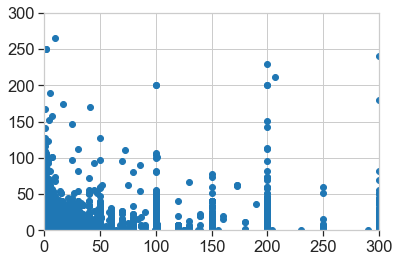

1.8457229150621142


In [70]:
from scipy import stats
x = new['TerroristNumber']
y = new['Killed']
slope, intercept,x_value,p_value,std_err = stats.linregress(x,y)

plt.scatter(x,y)

plt.axis([0,300,0,300])
plt.plot()
plt.show()


#Prediction
newX = 15.2
newY = newX*slope*intercept

print(newY)

## Given prediction x=15.2 that expected people to be killed is y = 4.2

This is how x and y look now:

In [73]:
nperps_real = new["TerroristNumber"].values
nkills_real = new["Killed"].values

x = np.array(nperps_real).reshape((-1, 1))
y = np.array(nkills_real)
print(x)

[[ 7.]
 [ 3.]
 [ 1.]
 ...
 [ 1.]
 [12.]
 [ 3.]]


In [74]:
print(y)

[0. 0. 0. ... 0. 0. 8.]


## Now, you have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

## As you can see, x has two dimensions, and x.shape is (n, 1), while y has a single dimension, and y.shape is (n,)

In [76]:
model = LinearRegression()

In [77]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
print('intercept:', model.intercept_)

intercept: 2.913036894496056


In [79]:
print('slope:', model.coef_)

slope: [0.04168472]


In [80]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[3.20482996 3.03809107 2.95472162 ... 2.95472162 3.41325358 3.03809107]


In [81]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[3.20482996 3.03809107 2.95472162 ... 2.95472162 3.41325358 3.03809107]


In [82]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.03347215001648096


## Since R^2 analysis's result is very close to 0 there is not any corelation between

## The total number of terrorists participating in the incident and The number of total confirmed fatalities for the incident